# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
1. Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

2. Its american tradition bitch
2. Its , ametican , tradition , bitch

3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
3. @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , . , . , . , Then , louder , ones

4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
4. " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
5. Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m

6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
6. @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
7. iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki

8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
8. RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !

9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
9. RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales/Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

10. Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
10. Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

11. Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
11. Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

12. @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
12. @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

13. Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
13. Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

14. Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
14. Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

15. Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
15. Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , . , . , . , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [178]:
import re, collections

In [179]:
from typing import List


def generate_corpus(data: List[str]) -> collections.defaultdict:
    """
    Generate a corpus from a list of strings

    Args:
    data: List of strings

    Returns:
    corpus: A dictionary with the frequency of each word
    """
    corpus = collections.defaultdict(int)
    for line in data:
        words = line.split()
        for word in words:
            corpus[' '.join(word) + ' </w>'] += 1
    return corpus


class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        self.vocab = None
        self.vocab_size = vocab_size

    def train(self, corpus: collections.defaultdict, verbose: bool = False) -> None:
        corpus_vocab = {}
        for word, freq in corpus.items():
            corpus_vocab[word] = freq

        # Vocab is a dictionary with tokens
        self.vocab = set()
        
        for word in corpus_vocab:
            for symbol in word.split():
                self.vocab.add(symbol)

        # Merge pairs until vocab size is reached
        i = 0
        while len(self.vocab) < self.vocab_size:
            pairs = self.get_stats(corpus_vocab)
            if not pairs:
                if verbose:
                    print(f'No pairs found. Vocab size: {len(self.vocab)}')
                break

            # Add new token to vocab
            best = max(pairs, key=pairs.get)
            self.vocab.add(''.join(best))

            # Merge best pair in corpus_vocab
            corpus_vocab = self.merge_vocab(best, corpus_vocab)

            if verbose:
                print(f'iteration: {i} best pair: {best} vocab: {self.vocab}')
                i += 1

        # Add empty line for readability
        if verbose:
            print()

    def tokenize(self, text: str) -> List[str]:
        tokens = []

        for word in text.split():
            word = word + '</w>'
            word_tokens = []

            while word:
                for i in range(len(word)):
                    if word[:len(word) - i] in self.vocab:
                        word_tokens.append(word[:len(word) - i])
                        word = word[len(word) - i:]
                        break
                    else :
                        if i == len(word) - 1:
                            word_tokens.append(word[:1])
                            word = word[1:]
                            break

            tokens.extend(word_tokens)
        return tokens

    def get_stats(self, vocab: List[str]) -> collections.defaultdict:
        pairs = collections.defaultdict(int)
        for word, freq in vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i + 1]] += freq
        return pairs
    
    def merge_vocab(self, pair: tuple, v_in: List[str]) -> List[str]:
        v_out = {}
        bigram = re.escape(' '.join(pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
        for word in v_in:
            w_out = p.sub(r''.join(pair), word)
            v_out[w_out] = v_in[word]
        return v_out

In [187]:
data = ["low low low low low lowest lowest newer newer newer newer newer newer wider wider wider new new"]
corpus = generate_corpus(data)

bpe = BPETokenizer(100)
bpe.train(corpus, verbose=True)

print(f'Final vocab: {bpe.vocab}')

iteration: 0 best pair: ('e', 'r') vocab: {'w', 'l', 'er', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 't', 'i'}
iteration: 1 best pair: ('er', '</w>') vocab: {'w', 'l', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 't', 'i'}
iteration: 2 best pair: ('n', 'e') vocab: {'ne', 'w', 'l', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 't', 'i'}
iteration: 3 best pair: ('ne', 'w') vocab: {'ne', 'w', 'l', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 'new', 't', 'i'}
iteration: 4 best pair: ('l', 'o') vocab: {'ne', 'w', 'l', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 'new', 't', 'i', 'lo'}
iteration: 5 best pair: ('lo', 'w') vocab: {'ne', 'w', 'l', 'low', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 'new', 't', 'i', 'lo'}
iteration: 6 best pair: ('new', 'er</w>') vocab: {'newer</w>', 'ne', 'w', 'l', 'low', 'er', 'er</w>', 'd', 'o', 's', 'r', 'n', '</w>', 'e', 'new', 't', 'i', 'lo'}
iteration: 7 best pair: ('low', '</w>') vocab: {'w', 'low', 'n', '</w>', 'e

In [188]:
# Test example
print(bpe.tokenize("low lower newest wider"))

['low</w>', 'lowe', 'r', '</w>', 'new', 'e', 's', 't', '</w>', 'wider</w>']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [193]:
# Read the files with tweets
tweets = []

for idx in range(1, 6):
    with open(f'file{idx}', 'r', encoding='utf8') as f:
        tweets.extend(f.read().splitlines())

print(f'Number of tweets: {len(tweets)}')

Number of tweets: 220


In [194]:
tweets_corpus = generate_corpus(tweets)

In [205]:
avg_tokenized_tweet_lens = []

vocab_sizes = [100, 250, 500, 750, 1000]

for vocab_size in vocab_sizes:
    bpe = BPETokenizer(vocab_size)
    bpe.train(tweets_corpus)
    print(f'=== Vocab size: {vocab_size} ===')

    # Tokenize all tweets
    tokens = []
    for tweet in tweets:
        tokens.extend(bpe.tokenize(tweet))

    print(f'Number of vocab tokens: {len(bpe.vocab)}')

    avg_token_len = sum([len(token) for token in tokens]) / len(tokens)
    avg_tokenized_tweet_len = sum([len(bpe.tokenize(tweet)) for tweet in tweets]) / len(tweets)

    avg_tokenized_tweet_lens.append(avg_tokenized_tweet_len)

    print(f'Avg. token length: {avg_token_len:.2f}')
    print(f'Avg. tokenized tweet length: {avg_tokenized_tweet_len:.2f}')
    print()

=== Vocab size: 100 ===
Number of vocab tokens: 167
Avg. token length: 1.45
Avg. tokenized tweet length: 98.29

=== Vocab size: 250 ===
Number of vocab tokens: 250
Avg. token length: 2.17
Avg. tokenized tweet length: 65.75

=== Vocab size: 500 ===
Number of vocab tokens: 500
Avg. token length: 2.83
Avg. tokenized tweet length: 50.35

=== Vocab size: 750 ===
Number of vocab tokens: 750
Avg. token length: 3.18
Avg. tokenized tweet length: 44.85

=== Vocab size: 1000 ===
Number of vocab tokens: 1000
Avg. token length: 3.46
Avg. tokenized tweet length: 41.26



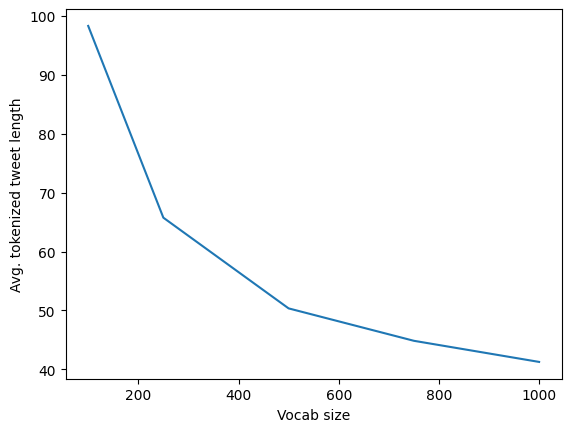

In [206]:
# Plot the dependency between vocab size and avg. tokenized tweet length
import matplotlib.pyplot as plt

plt.plot(vocab_sizes, avg_tokenized_tweet_lens)
plt.xlabel('Vocab size')
plt.ylabel('Avg. tokenized tweet length')
plt.show()

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [211]:
# === Acknowledgements ===
# Dataset used: https://www.kaggle.com/datasets/mksaad/arabic-sentiment-twitter-corpus

dataset = []

with open('test_Arabic_tweets_positive_20190413.txt', 'r', encoding='utf8') as f:
    dataset.extend(f.read().splitlines())

dataset = dataset[:200]

In [212]:
arabic_tweets_corpus = generate_corpus(dataset)

In [213]:
for vocab_size in vocab_sizes:
    bpe = BPETokenizer(vocab_size)
    bpe.train(arabic_tweets_corpus)
    print(f'=== Vocab size: {vocab_size} ===')

    # Tokenize all tweets
    tokens = []
    for tweet in tweets:
        tokens.extend(bpe.tokenize(tweet))

    print(f'Number of vocab tokens: {len(bpe.vocab)}')

    avg_token_len = sum([len(token) for token in tokens]) / len(tokens)
    avg_tokenized_tweet_len = sum([len(bpe.tokenize(tweet)) for tweet in tweets]) / len(tweets)

    avg_tokenized_tweet_lens.append(avg_tokenized_tweet_len)

    print(f'Avg. token length: {avg_token_len:.2f}')
    print(f'Avg. tokenized tweet length: {avg_tokenized_tweet_len:.2f}')
    print()

=== Vocab size: 100 ===
Number of vocab tokens: 234
Avg. token length: 1.45
Avg. tokenized tweet length: 98.29

=== Vocab size: 250 ===
Number of vocab tokens: 250
Avg. token length: 1.45
Avg. tokenized tweet length: 98.29

=== Vocab size: 500 ===
Number of vocab tokens: 500
Avg. token length: 1.48
Avg. tokenized tweet length: 96.54

=== Vocab size: 750 ===
Number of vocab tokens: 750
Avg. token length: 1.49
Avg. tokenized tweet length: 95.85

=== Vocab size: 1000 ===
Number of vocab tokens: 1000
Avg. token length: 1.51
Avg. tokenized tweet length: 94.51

